In [ ]:
!pip install lime


In [2]:
!pip install tensorflow

  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-1-py2.py3-none-macosx_11_0_arm64.whl.metadata (5.2 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.7/252.7 MB 3.2 MB/s eta 0:00:0000:0100:03
Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
Using cached gast-0.6.0-py3-none-any.whl (21 kB)
Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 5.0 MB/s eta 0:00:00a 0:00:01
Using cached libclang-18.1.1-1-py2.py3-none-macosx_11_0_arm64.whl (25.8 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.4/670.4 kB 4.6 MB/s eta 0:00:00
Using cached opt_einsum-3.4.0-py3-none-any.whl (71 kB)


In [3]:
#Importing Necessary Libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import os
import seaborn as sns
import string
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from lime.lime_text import LimeTextExplainer

In [5]:
chat_df=pd.read_csv('OpenGPTText_cSV_format/AI/urlsf_subset00.csv')
chat_df_1=pd.read_csv('OpenGPTText_cSV_format/AI/urlsf_subset01.csv')
chat_df_2=pd.read_csv('OpenGPTText_cSV_format/AI/urlsf_subset02.csv')
chat_df_3=pd.read_csv('OpenGPTText_cSV_format/AI/urlsf_subset03.csv')
chat_df_4=pd.read_csv('OpenGPTText_cSV_format/AI/urlsf_subset04.csv')
chat_df_5=pd.read_csv('OpenGPTText_cSV_format/AI/urlsf_subset05.csv')
chat_df_6=pd.read_csv('OpenGPTText_cSV_format/AI/urlsf_subset06.csv')
chat_df_9=pd.read_csv('OpenGPTText_cSV_format/AI/urlsf_subset09.csv')

In [6]:
chat_df.head()

,uid,text
0,[urlsf_subset00]-[83],The National Weather Service's Mike McFarland ...
1,[urlsf_subset00]-[89],The President of the United States was seen on...
2,[urlsf_subset00]-[390],Enner Valencia scored two goals in Ecuador's 2...
3,[urlsf_subset00]-[457],"Beginning with the introduction, the author sh..."
4,[urlsf_subset00]-[458],Mexico has implemented its newest data retenti...


In [7]:
ai_generated_df=pd.concat([chat_df,chat_df_1,chat_df_2,chat_df_3,chat_df_4,chat_df_5,chat_df_6,chat_df_9])
ai_generated_df.head()

,uid,text
0,[urlsf_subset00]-[83],The National Weather Service's Mike McFarland ...
1,[urlsf_subset00]-[89],The President of the United States was seen on...
2,[urlsf_subset00]-[390],Enner Valencia scored two goals in Ecuador's 2...
3,[urlsf_subset00]-[457],"Beginning with the introduction, the author sh..."
4,[urlsf_subset00]-[458],Mexico has implemented its newest data retenti...


In [8]:
ai_generated_df.shape

(29395, 2)

In [9]:
ai_generated_df['label']=1

In [10]:
ai_generated_df.head()

,uid,text,label
0,[urlsf_subset00]-[83],The National Weather Service's Mike McFarland ...,1
1,[urlsf_subset00]-[89],The President of the United States was seen on...,1
2,[urlsf_subset00]-[390],Enner Valencia scored two goals in Ecuador's 2...,1
3,[urlsf_subset00]-[457],"Beginning with the introduction, the author sh...",1
4,[urlsf_subset00]-[458],Mexico has implemented its newest data retenti...,1


In [11]:
ai_df = ai_generated_df.drop(columns=['uid'])

# Save the updated DataFrame back to a CSV file
ai_df.to_csv('ai.csv', index=False)

the: 506565
to: 234189
and: 205409
of: 196799
in: 150222
that: 106459
is: 91213
for: 85026
with: 63383
on: 63117
as: 56247
it: 50299
has: 48201
was: 47442
be: 42953
by: 40812
from: 37660
are: 37630
he: 36138
this: 35312
his: 35014
have: 34594
their: 32471
an: 32359
at: 29987
not: 29605
will: 29583
they: 27261
which: 25207
been: 22162
who: 21875
or: 20563
but: 19458
can: 18728
had: 17788
also: 17563
were: 17362
new: 17108
more: 16577
however: 15778
one: 15616
its: 15337
about: 14371
would: 13589
while: 12635
her: 12502
when: 12250
after: 12105
there: 12030
up: 11998


/var/folders/hn/9hd29hb13471cqb3n5qsh7gw0000gn/T/ipykernel_87738/4148577766.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(freqs), y=list(words), palette='viridis')


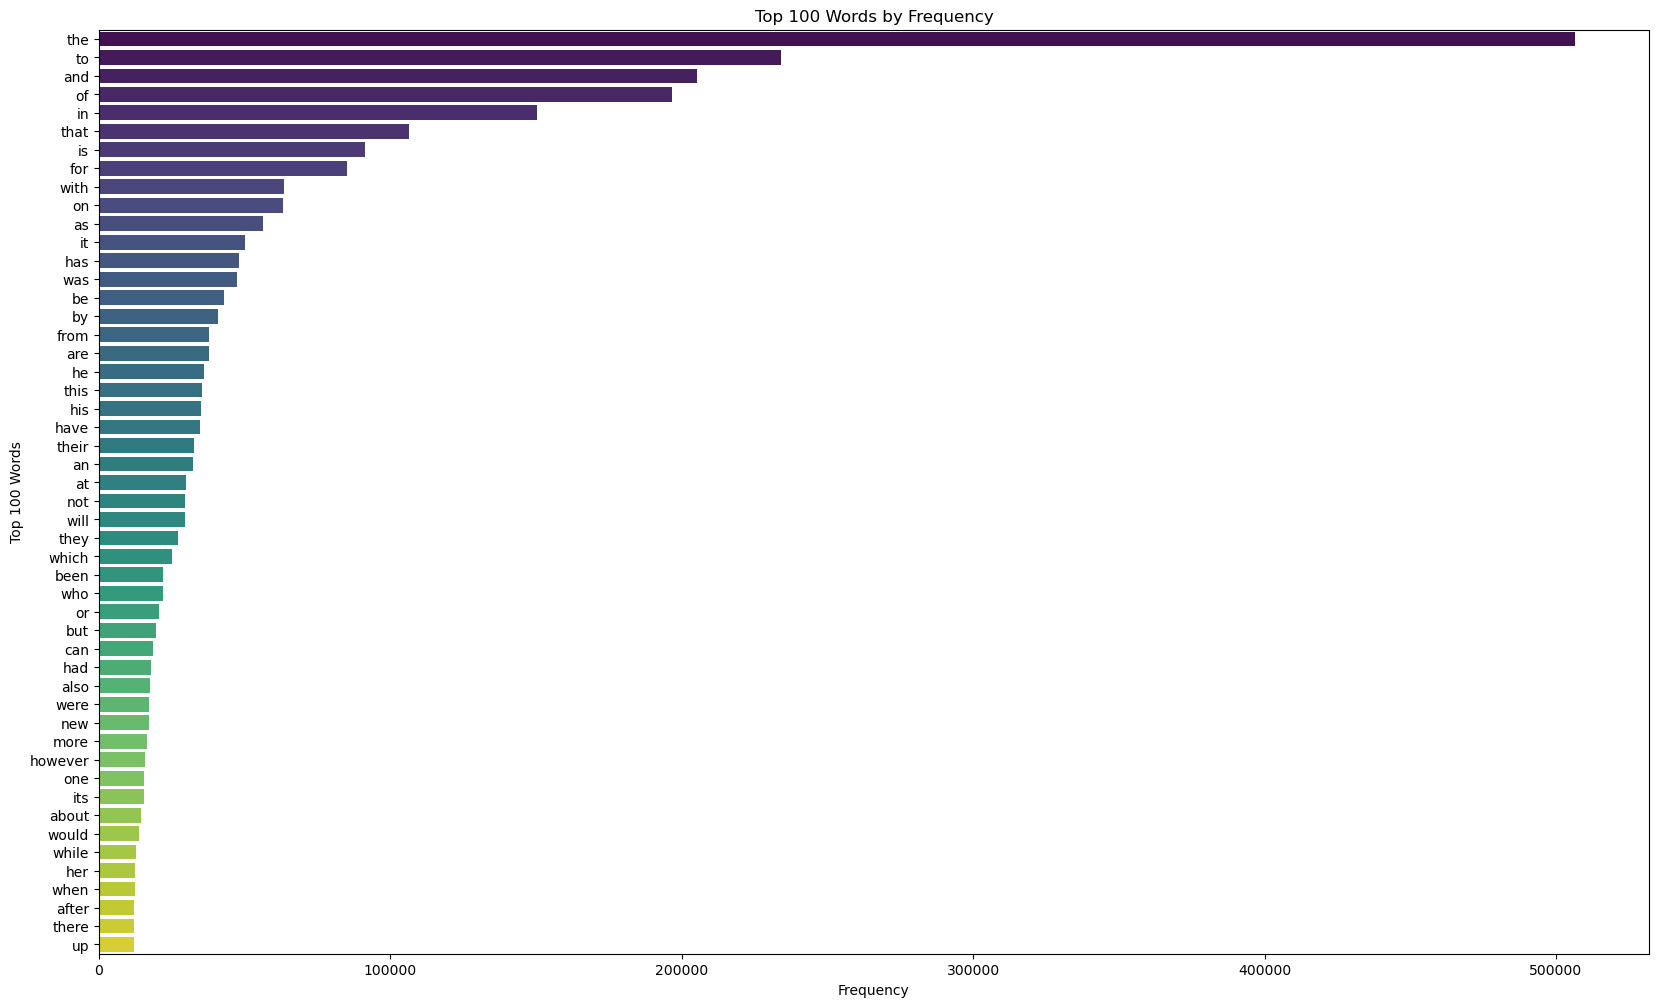

In [12]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming ai_df is your dataframe and it contains a column 'text'
# Step 1: Create the Bag of Words model
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(ai_df['text'])

# Step 2: Sum up the word counts and get the top 25 words
word_counts = X.toarray().sum(axis=0)
word_freq = dict(zip(vectorizer.get_feature_names_out(), word_counts))
sorted_word_freq = sorted(word_freq.items(), key=lambda item: item[1], reverse=True)
top_50_words = sorted_word_freq[:50]

# Print the top 25 words with their frequencies
for word, freq in top_50_words:
    print(f"{word}: {freq}")

# Step 3: Plot the frequencies
words, freqs = zip(*top_50_words)
plt.figure(figsize=(20, 12))
sns.barplot(x=list(freqs), y=list(words), palette='viridis')
plt.xlabel('Frequency')
plt.ylabel('Top 100 Words')
plt.title('Top 100 Words by Frequency')
plt.show()


In [13]:
open_df=pd.read_csv('OpenGPTText_cSV_format/Human/urlsf_subset00 (1).csv')
open_df_1=pd.read_csv('OpenGPTText_cSV_format/Human/urlsf_subset01 (1).csv')
open_df_2=pd.read_csv('OpenGPTText_cSV_format/Human/urlsf_subset02 (1).csv')
open_df_3=pd.read_csv('OpenGPTText_cSV_format/Human/urlsf_subset03 (1).csv')
open_df_4=pd.read_csv('OpenGPTText_cSV_format/Human/urlsf_subset04 (1).csv')
open_df_5=pd.read_csv('OpenGPTText_cSV_format/Human/urlsf_subset05 (1).csv')
open_df_6=pd.read_csv('OpenGPTText_cSV_format/Human/urlsf_subset06 (1).csv')
open_df_9=pd.read_csv('OpenGPTText_cSV_format/Human/urlsf_subset09 (1).csv')

In [14]:
open_df.head()
open_df=pd.concat([open_df,open_df_1,open_df_2,open_df_3,open_df_4,open_df_5,open_df_6,open_df_9])
open_df.head()

,uid,text
0,[urlsf_subset00]-[83],Check current weather conditions\r\nIt's going...
1,[urlsf_subset00]-[89],"On Thursday, the president of the United State..."
2,[urlsf_subset00]-[390],Curitiba -\r\nEl delantero Enner Valencia marc...
3,[urlsf_subset00]-[457],Getting started\r\n(I'm using Windows 10)\r\nA...
4,[urlsf_subset00]-[458],"Today, Mexico's newest data retention law ente..."


In [15]:
open_df.shape

(29142, 2)

In [16]:
open_df['label']=0

In [17]:
open_df.drop(columns=['uid'])

,text,label
0,Check current weather conditions\r\nIt's going...,0
1,"On Thursday, the president of the United State...",0
2,Curitiba -\r\nEl delantero Enner Valencia marc...,0
3,Getting started\r\n(I'm using Windows 10)\r\nA...,0
4,"Today, Mexico's newest data retention law ente...",0
...,...,...
3648,Academic freedom -- for conservatives -- died ...,0
3649,When Dylan Higgins invited me on to the Field ...,0
3650,John Kasich. AP Photo/John Minchillo\r\nJohn K...,0
3651,A Navy-funded thermal engine bobbing off the c...,0


In [18]:
open_df.to_csv('human.csv', index=False)

the: 960900
to: 465387
of: 417625
and: 405063
in: 319984
that: 206867
is: 174185
for: 163822
it: 149574
on: 138599
with: 116074
as: 102692
was: 98274
be: 87686
he: 87109
this: 85823
are: 81632
at: 80810
you: 79719
have: 76194
by: 75271
from: 74341
we: 70409
but: 69319
not: 65515
said: 64968
they: 63282
has: 63252
an: 62327
his: 59209
will: 54555
or: 52355
more: 46121
their: 45787
who: 44082
can: 43245
one: 43014
about: 40916
all: 39741
if: 36909
there: 36869
which: 36226
been: 36100
up: 35828
would: 35483
had: 34710
out: 34689
were: 34602
when: 34072
what: 33601


/var/folders/hn/9hd29hb13471cqb3n5qsh7gw0000gn/T/ipykernel_87738/3785077587.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(freqs), y=list(words), palette='viridis')


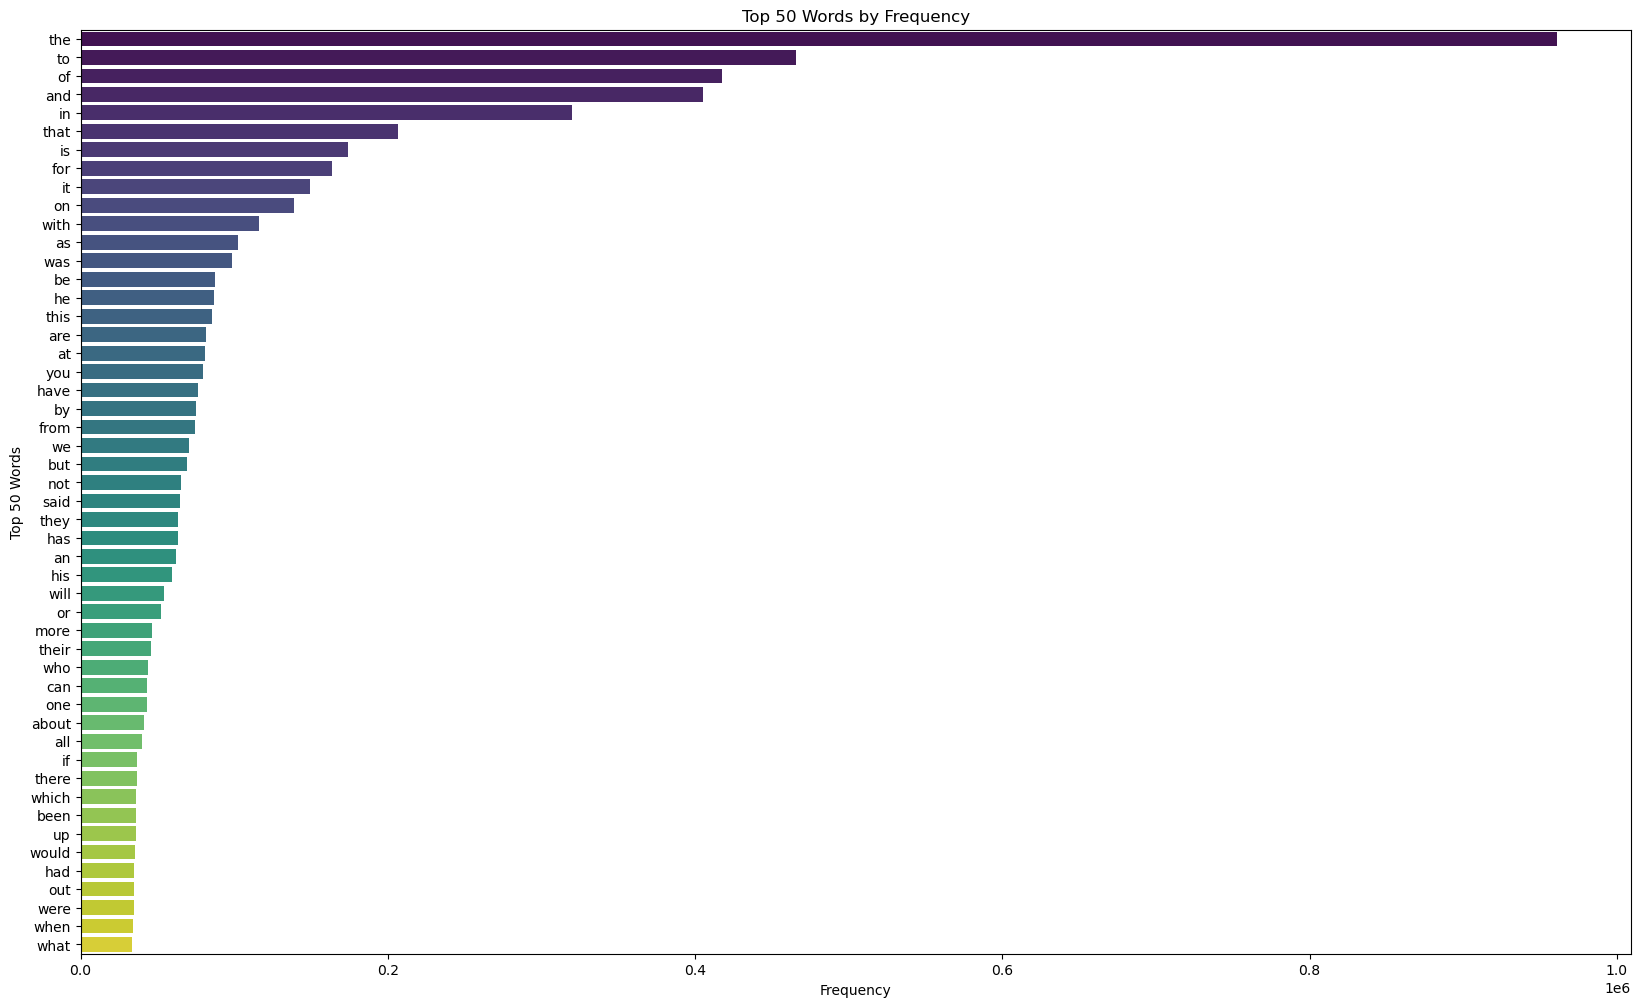

In [19]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming ai_df is your dataframe and it contains a column 'text'
# Step 1: Create the Bag of Words model
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(open_df['text'])

# Step 2: Sum up the word counts and get the top 25 words
word_counts = X.toarray().sum(axis=0)
word_freq = dict(zip(vectorizer.get_feature_names_out(), word_counts))
sorted_word_freq = sorted(word_freq.items(), key=lambda item: item[1], reverse=True)
top_50_words = sorted_word_freq[:50]

# Print the top 25 words with their frequencies
for word, freq in top_50_words:
    print(f"{word}: {freq}")

# Step 3: Plot the frequencies
words, freqs = zip(*top_50_words)
plt.figure(figsize=(20, 12))
sns.barplot(x=list(freqs), y=list(words), palette='viridis')
plt.xlabel('Frequency')
plt.ylabel('Top 50 Words')
plt.title('Top 50 Words by Frequency')
plt.show()
